In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install numpy pandas matplotlib scipy 

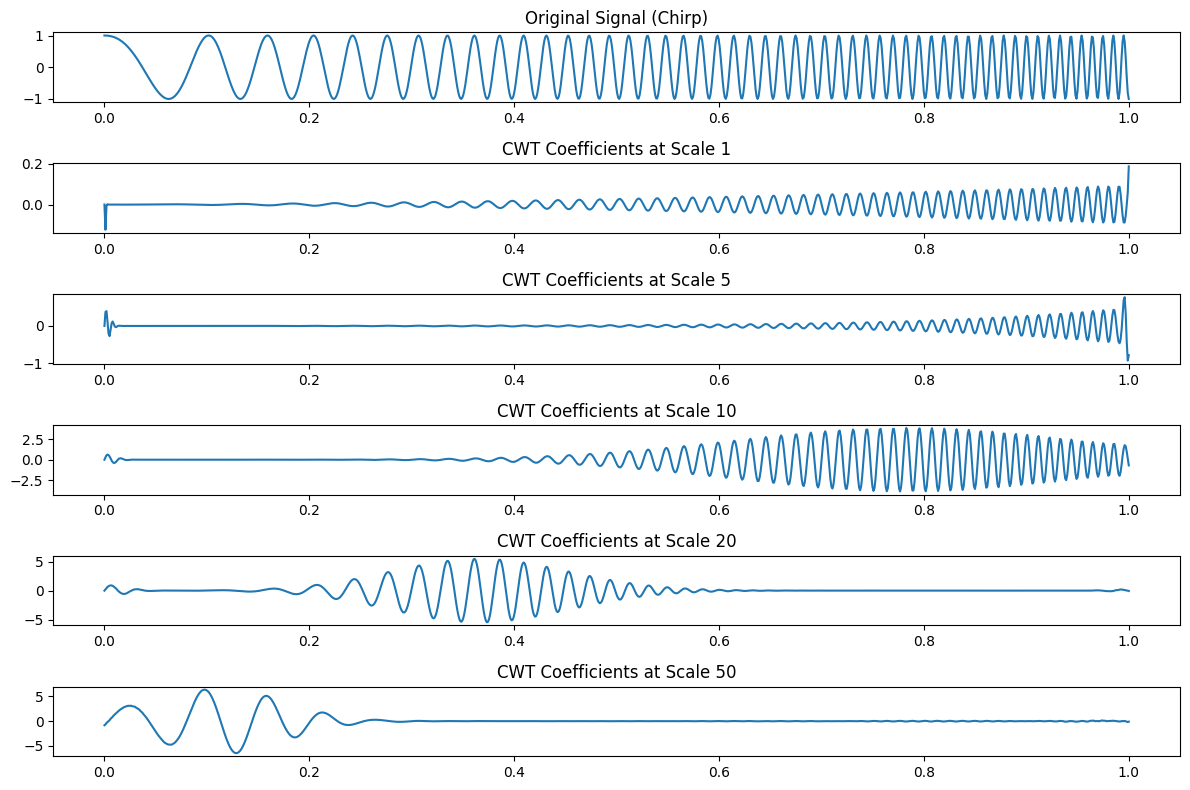

In [2]:

import pywt
from scipy.signal import chirp

# Generate a sample signal: A chirp signal with increasing frequency over time
t = np.linspace(0, 1, 1000)
signal = chirp(t, f0=5, f1=100, t1=1, method='linear')

# Define scales for wavelet transform: smaller scales capture high frequency, larger capture low frequency
scales = np.array([1, 5, 10, 20, 50])

# Perform Continuous Wavelet Transform
# Morlet wavelet as the mother wavelet
coefficients, frequencies = pywt.cwt(signal, scales, 'morl' , sampling_period=t[1] - t[0])

# Plot original signal
plt.figure(figsize=(12, 8))
plt.subplot(len(scales) + 1, 1, 1)
plt.plot(t, signal)
plt.title("Original Signal (Chirp)")

# Plot wavelet coefficients for each scale
for i, scale in enumerate(scales):
    plt.subplot(len(scales) + 1, 1, i + 2)
    plt.plot(t, coefficients[i, :])
    plt.title(f"CWT Coefficients at Scale {scale}")

plt.tight_layout()
plt.show()


C:\Users\Juswanth-T\AppData\Local\Temp\ipykernel_28168\2192939320.py:19: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_result = cwt(signal, ricker, widths)


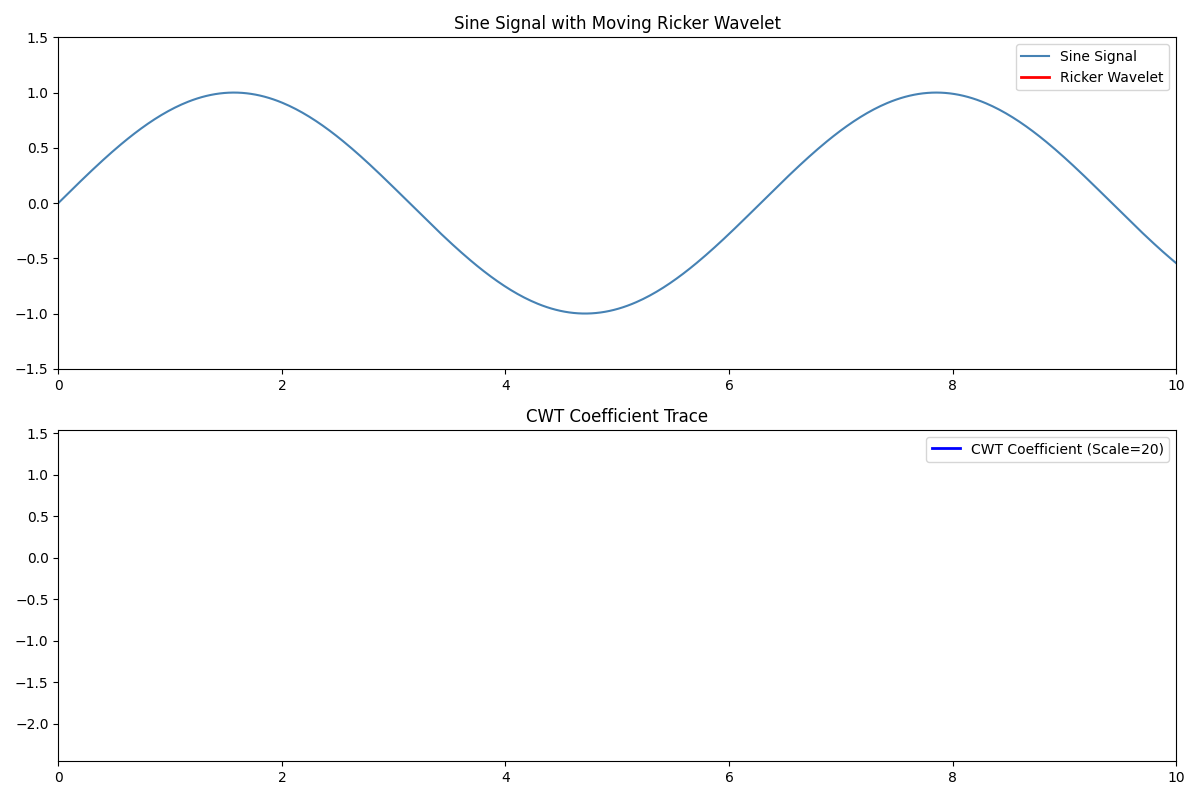

In [3]:
# Animation of Ricker Wavelet Traversing a Sine Signal with CWT Coefficient Trace

from scipy.signal import cwt, ricker
from matplotlib.animation import FuncAnimation
%matplotlib ipympl
from IPython import display

# Parameters
scale = 20
wavelet_length = 201  # Must be odd for symmetry
widths = np.array([scale])  # Only one scale for this example


# Precompute the CWT coefficients for the signal

x = np.linspace(0, 10, 500)
signal = np.sin(x)

cwt_result = cwt(signal, ricker, widths)
cwt_values = cwt_result[0]



# Initialize the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# First Plot: Sine Signal and Moving Ricker Wavelet
ax1.plot(x, signal, color='steelblue', label='Sine Signal')
wavelet_line, = ax1.plot([], [], color='red', lw=2, label='Ricker Wavelet')
ax1.set_xlim(0, 10)
ax1.set_ylim(-1.5, 1.5)
ax1.legend(loc='upper right')
ax1.set_title('Sine Signal with Moving Ricker Wavelet')

# Second Plot: CWT Coefficient Trace
ax2.set_xlim(0, 10)
ax2.set_ylim(np.min(cwt_values) - 0.1, np.max(cwt_values) + 0.1)
cwt_trace, = ax2.plot([], [], color='blue', lw=2, label=f'CWT Coefficient (Scale={scale})')
current_point, = ax2.plot([], [], 'ro')  # Current CWT coefficient
ax2.legend(loc='upper right')
ax2.set_title('CWT Coefficient Trace')

# Initialize lists to store trace data
trace_x = []
trace_y = []

# Function to initialize the animation
def init():
    wavelet_line.set_data([], [])
    cwt_trace.set_data([], [])
    current_point.set_data([], [])
    return wavelet_line, cwt_trace, current_point

# Function to update the animation
def update(frame):
    # Center position for the wavelet
    center = frame
    half_wavelet = wavelet_length // 2

    # Create a shifted wavelet 
    shifted_wavelet_full = np.zeros_like(x)
    start = center - half_wavelet
    end = center + half_wavelet + 1

    # Handle boundaries
    if start < 0:
        wavelet_start = -start
        shifted_wavelet_full[:end] = ricker(wavelet_length, scale)[wavelet_start:]
    elif end > len(x):
        wavelet_end = len(x) - start
        shifted_wavelet_full[start:] = ricker(wavelet_length, scale)[:wavelet_end]
    else:
       shifted_wavelet_full[start:end] = ricker(wavelet_length, scale)

    # Scale wavelet for better visibility
    shifted_wavelet_full *= 2  # Adjust amplitude as needed

    # Update the wavelet plot (overlay on sine signal)
    wavelet_line.set_data(x, shifted_wavelet_full)

    # Update the CWT coefficient trace
    trace_x.append(x[frame])
    trace_y.append(cwt_values[frame])
    cwt_trace.set_data(trace_x, trace_y)
    current_point.set_data(x[frame], cwt_values[frame])

    return wavelet_line, cwt_trace, current_point

# Create the animation
ani = FuncAnimation(
    fig,
    update,
    frames=len(x),
    init_func=init,
    blit=True,
    interval=1,
    repeat=False,
)

plt.tight_layout()
plt.show()